# Case study: How Does a Bike-Share Navigate Speedy Success?

*Rūta Melanija Pupelytė*<br>
*2023-04-28*<br>

## Introduction
<br>
<div style="text-align: justify">This project is the capstone assignment for the <a href="https://www.coursera.org/professional-certificates/google-data-analytics">Google Data Analytics Professional Certificate</a> program. The program prepares participants for a career in data analytics with training focused on key analytical skills, including data cleaning, analysis, and visualization, as well as various tools such as Spreadsheets/Excel, SQL, R Programming, and Tableau.<br>
For this project, I will be analyzing publicly available data sets provided by the course on a bike share program based in Chicago. Through this project, I aim to showcase my proficiency in data analysis and visualization, and apply the knowledge and skills gained through the program to real-world scenarios.</div>

## Summary
<br>
<div style="text-align: justify">Cyclistic is a bike-share company in Chicago that offers single-ride passes, full-day passes, and annual memberships. The company's finance analysts have concluded that annual members are more profitable than casual riders, and the director of marketing wants to maximize the number of annual memberships to ensure the company's future success. As a junior data analyst in the marketing analyst team, I am tasked with analyzing the historical bike trip data to understand how casual riders and annual members use Cyclistic bikes differently. The insights gained will be used to design a new marketing strategy to convert casual riders into annual members, backed up with compelling data insights and professional data visualizations for Cyclistic executives.</div>

## 1. Ask
What is the problem I am trying to solve?:
- How do annual members and casual riders use Cyclistic bikes differently?

How can my insights drive business decisions?:
- Identifying the main differences between members and casual riders can help us establish who Cyclistic customers are and 
provide key information that will help Cyclistic improve its services, attract more customers, and increase profitability, develope the business strategy and marketing campaign.

Who are the key stakeholders?:
- The Director of Marketing;
- Cyclistic's Executive team;
- The Marketing Analyst team.

## 2. Prepare
<br>
<div style="text-align: justify">Download the previous <a href="https://divvy-tripdata.s3.amazonaws.com/index.html">12 months of Cyclistic trip data here</a>. (Note: The data has been made available by Motivate International Inc. under this <a href="https://ride.divvybikes.com/data-license-agreement">license</a>.) Each dataset captures the details of every ride logged by the customers of Cyclistic. This data that has been made publicly available has been scrubbed to omit rider's personal information.<br>
The combined size of all 12 datasets is approximately 1 GB. Data cleaning in spreadsheets can be time-consuming and slow compared to specialized data wrangling tools like Python, SQL, or R. Therefore, I have chosen Python as my preferred tool for this project because it enables me to perform data cleaning, analysis, and visualizations in a single platform.</div>

##### Load libraries

In [1]:
# %pip install pandas
# %pip install numpy
# %pip install geopy

import numpy as np
import pandas as pd
import os
import re
from matplotlib import pyplot as plt
from IPython.display import Image
from math import radians, cos, sin, asin, sqrt
from pandas.api.types import CategoricalDtype
from geopy.distance import geodesic
import seaborn as sns

##### Import datasets
While it may appear that all files are named in a consistent format, some actually use different naming conventions. To streamline the process and make it easier to perform data correction work later on, I have opted to automate the files import process and organize the data in a Python dictionary.

In [2]:
# Specify the data (CSV files) directory
csv_path = r"\Data_230401"

# Initialize an empty dictionary to store the dataframes and filenames
dfs_dict = {}

# Initialize a counter for the dataframe names
count = 1

# Import all CSV files into the dictionary by looping through every file in the folder
for file in os.listdir(csv_path):
    if file.endswith(".csv"):
        # Read the CSV file into a dataframe
        file_path = os.path.join(csv_path, file)
        df = pd.read_csv(file_path)

        # Create a dictionary key in the format 'df1', 'df2', etc.
        df_name = f"df{count}"

        # Store the dataframe and the filename in the dictionary
        dfs_dict[df_name] = {"filename": file, "dataframe": df}

        # Increment the counter
        count += 1

##### Check dataframe names, data structures and data types

In [7]:
# Loop through all elements of the dictionary
for name, df in dfs_dict.items():
    # Print the file name
    print(f"File name: {dfs_dict[name]['filename']}")

    # Print the dataframe name
    print(f"Dataframe name: {name}")

    # Print the dataframe information
    print("Dataframe info:")
    df["dataframe"].info()
    print()

File name: 202203-divvy-tripdata.csv
Dataframe name: df1
Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284042 entries, 0 to 284041
Data columns (total 13 columns):
ride_id               284042 non-null object
rideable_type         284042 non-null object
started_at            284042 non-null object
ended_at              284042 non-null object
start_station_name    236796 non-null object
start_station_id      236796 non-null object
end_station_name      232885 non-null object
end_station_id        232885 non-null object
start_lat             284042 non-null float64
start_lng             284042 non-null float64
end_lat               283776 non-null float64
end_lng               283776 non-null float64
member_casual         284042 non-null object
dtypes: float64(4), object(9)
memory usage: 28.2+ MB

File name: 202204-divvy-tripdata.csv
Dataframe name: df2
Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371249 entries, 0 to 371248
Data columns (total 13

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190301 entries, 0 to 190300
Data columns (total 13 columns):
ride_id               190301 non-null object
rideable_type         190301 non-null object
started_at            190301 non-null object
ended_at              190301 non-null object
start_station_name    163580 non-null object
start_station_id      163580 non-null object
end_station_name      162461 non-null object
end_station_id        162461 non-null object
start_lat             190301 non-null float64
start_lng             190301 non-null float64
end_lat               190174 non-null float64
end_lng               190174 non-null float64
member_casual         190301 non-null object
dtypes: float64(4), object(9)
memory usage: 18.9+ MB

File name: 202302-divvy-tripdata.csv
Dataframe name: df12
Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190445 entries, 0 to 190444
Data columns (total 13 columns):
ride_id               190445 non-null object
rideable_type   

##### Variable description
- <b>ride_id (categorical)</b>: Unique number assigned to a ride trip.
- <b>rideable_type (categorical)</b>: Type of bike used during trip; standard two-wheel bike, reclining bike, hand tricycle, or cargo bike.
- <b>started_at (datetime)</b>: Start date and time for the trip
- <b>ended_at (datetime)</b>: End data and time for the trip
- <b>start_station_name (categorical)</b>: Name of the station where the trip started
- <b>start_station_id (categorical)</b>: Unique identification code assigned to the start station.
- <b>end_station_name (categorical)</b>: Name of the station where the trip ended.
- <b>end_station_id (categorical)</b>: Unique identification code assigned to the end station.
- <b>start_lat (numeric)</b>: Latitude coordinate of where the trip started.
- <b>start_lng (numeric)</b>: Longitude coordinate of where the trip started.
- <b>end_lat (numeric)</b>: Latitude coordinate of where the trip ended.
- <b>end_lng (numeric)</b>: Longitude coordinate of where the trip ended.
- <b>member_casual (categorical)</b>: Customer type; “member” = annual member, “casual” = casual rider.

##### Does this data meets ROCCC standards of integrity?
— Reliable: The sample size is over 5.8 million records, which is statistically significant to reflect the overall behavior of the total population. Although the dataset contains some incomplete entries, these account for less than 0.1% of all data entries, which can be reasonably ignored for the purpose of this analysis;<br>
— Original: The dataset was originally provided by Motivate International Inc. The company gathered this data first-hand;<br>
— Comprehensive: The dataset is comprehensive, providing a timestamp entry for all relevant information pertaining to each unique trip. This allows for the derivation of credible insights, as all critical information necessary for answering the question or finding the solution is present. The dataset contains more than 5.8 million complete data entries;<br>
— Current: The dataset is up-to-date, including data from the past 12 months and capturing each day across the year;<br>
— Cited: This project has adhered to the clauses and terms of the license provided [here](https://www.divvybikes.com/data-license-agreement).

In [8]:
# Change the started_at and ended_at column types to datetime

for df_name in dfs_dict.keys():
    dfs_dict[df_name]["dataframe"]["started_at"] = pd.to_datetime(
        dfs_dict[df_name]["dataframe"]["started_at"]
    )

for df_name in dfs_dict.keys():
    dfs_dict[df_name]["dataframe"]["ended_at"] = pd.to_datetime(
        dfs_dict[df_name]["dataframe"]["ended_at"]
    )

In [9]:
# Loop through all elements of the dictionary once more after implementing the changes
for name, df in dfs_dict.items():
    # Print the file name
    print(f"File name: {dfs_dict[name]['filename']}")

    # Print the dataframe name
    print(f"Dataframe name: {name}")

    # Print the dataframe information
    print("Dataframe info:")
    df["dataframe"].info()
    print()

File name: 202203-divvy-tripdata.csv
Dataframe name: df1
Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284042 entries, 0 to 284041
Data columns (total 13 columns):
ride_id               284042 non-null object
rideable_type         284042 non-null object
started_at            284042 non-null datetime64[ns]
ended_at              284042 non-null datetime64[ns]
start_station_name    236796 non-null object
start_station_id      236796 non-null object
end_station_name      232885 non-null object
end_station_id        232885 non-null object
start_lat             284042 non-null float64
start_lng             284042 non-null float64
end_lat               283776 non-null float64
end_lng               283776 non-null float64
member_casual         284042 non-null object
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 28.2+ MB

File name: 202204-divvy-tripdata.csv
Dataframe name: df2
Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371249 entries,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190301 entries, 0 to 190300
Data columns (total 13 columns):
ride_id               190301 non-null object
rideable_type         190301 non-null object
started_at            190301 non-null datetime64[ns]
ended_at              190301 non-null datetime64[ns]
start_station_name    163580 non-null object
start_station_id      163580 non-null object
end_station_name      162461 non-null object
end_station_id        162461 non-null object
start_lat             190301 non-null float64
start_lng             190301 non-null float64
end_lat               190174 non-null float64
end_lng               190174 non-null float64
member_casual         190301 non-null object
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 18.9+ MB

File name: 202302-divvy-tripdata.csv
Dataframe name: df12
Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190445 entries, 0 to 190444
Data columns (total 13 columns):
ride_id               1904

## 3. Process

Check and, if necessary, fix the structure of the dataframes

In [12]:
# Create reference dataframe
ref_df = list(dfs_dict.values())[0]["dataframe"]

# Find dataframe name of reference dataframe
for key, val in dfs_dict.items():
    if val["filename"] == list(dfs_dict.values())[0]["filename"]:
        ref_df_key = key
        print("Reference dataframe is: ", ref_df_key)
        break

# Initialize a counter
count = 1

# Check the structure of each dataframe in the dictionary
for df_name, df in dfs_dict.items():
    if not ref_df.equals(df["dataframe"]):
        # If the dataframe structure is not the same as the reference, get the unique column names
        unique_cols = set(df["dataframe"].columns) - set(ref_df.columns)
        missing_cols = set(ref_df.columns) - set(df["dataframe"].columns)

        if unique_cols and missing_cols:
            # If there are unique columns, print the dataframe name and unique column names
            print(
                f"{count}. {ref_df_key} different column(s): [{', '.join(missing_cols)}]; {df_name} different column(s): [{', '.join(unique_cols)}]"
            )
            count += 1
        # Get the columns that are in the reference dataframe but not in the current dataframe

        elif missing_cols:
            # If there are missing columns, print the dataframe name and missing column names
            print(
                f"{count}. {ref_df_key} different column(s): [{', '.join(missing_cols)}]"
            )
            count += 1

        elif unique_cols:
            # If there are unique columns, print the dataframe name and unique column names
            print(f"{count}. {df_name} different column(s): [{', '.join(unique_cols)}]")
            count += 1
    else:
        print(
            "The structure of every dataframe is identical to the reference dataframe"
        )

Reference dataframe is:  df1
The structure of every dataframe is identical to the reference dataframe


Check and, if necessary, fix the data types of the dataframes

In [13]:
# Initialize a counter
count = 1

# Check the structure of each dataframe in the dictionary
for df_name, df in dfs_dict.items():
    if not ref_df.equals(df["dataframe"]):
        # get the columns that are in both dataframes but have different data types
        diff_cols = set(ref_df.columns) & set(df["dataframe"].columns)
        diff_cols = [
            col for col in diff_cols if ref_df[col].dtype != df["dataframe"][col].dtype
        ]
        if diff_cols:
            # if there are different data types, print the dataframe name and column names with their data types
            for col in diff_cols:
                print(
                    f"{count}. {df_name} column [{col}] has a different data type: {ref_df_key}: {ref_df[col].dtype}, {df_name}: {df['dataframe'][col].dtype}"
                )
                count += 1
    else:
        print(
            "The data types of every dataframe is identical to the reference dataframe"
        )

The data types of every dataframe is identical to the reference dataframe


Merge all the dataframes in the dfs_dict into a single dataframe

In [14]:
df = pd.concat([dfs_dict[key]["dataframe"] for key in dfs_dict])

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5829084 entries, 0 to 190444
Data columns (total 13 columns):
ride_id               object
rideable_type         object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name    object
start_station_id      object
end_station_name      object
end_station_id        object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual         object
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 622.6+ MB
None


Identify test rides and remove it from the dataframe

In [15]:
# Find test rides
test_rides = len(
    df[
        (df["start_station_name"].str.lower().str.contains("test") == True)
        | (df["end_station_name"].str.lower().str.contains("test") == True)
    ]
)
print("Discovered test rides: ", test_rides)

# Drop rows containing 'tests' in 'start_station_name' and 'end_station_name' columns
if test_rides > 0:
    print("Row number before changes: ", df.shape[0])
    df = df[
        ~(
            df["start_station_name"].str.lower().str.contains("test")
            | df["end_station_name"].str.lower().str.contains("test")
        )
    ]
    print("Row number after changes: ", df.shape[0])

Discovered test rides:  0


Identify missing values across columns and remove it from the dataframe

In [16]:
# Identify missing values across columns
print(df.isnull().sum())

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    850418
start_station_id      850550
end_station_name      909038
end_station_id        909179
start_lat                  0
start_lng                  0
end_lat                 5938
end_lng                 5938
member_casual              0
dtype: int64


Dataframe is missing some values in the following columns:
- start_station_name;
- start_station_id;
- end_station_name;
- end_station_id;
- end_lat;
- end_lng.<br>

Some columns are related to each other:
- start_station_name, start_station_id;
- end_station_name, end_station_id, end_lat, end_lng.<br>

If all four (station name, station id, end_lat and end_lng) are NULLs, these values should be removed from the Dataframe

In [17]:
# Drop the rows where 'end_station_name', 'end_station_id', 'end_lat', 'end_lng' are null
df.dropna(
    subset=["end_station_name", "end_station_id", "end_lat", "end_lng"],
    how="all",
    inplace=True,
)
print(df.isnull().sum())

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    850418
start_station_id      850550
end_station_name      903100
end_station_id        903241
start_lat                  0
start_lng                  0
end_lat                    0
end_lng                    0
member_casual              0
dtype: int64


In the DataFrame, some columns, such as start_station_name and/or start_station_id, or end_station_name and/or end_station_id, have missing values. However, start_lat and start_lng or end_lat and end_lng have all complete values, indicating that the bicycle trip has taken place. Therefore, removing such data from the DataFrame may significantly affect the final results (in this case, deleting 903241 rows would decrease our DataFrame data by 15%).

To address this issue, I will populate the blank columns (start_station_name, start_station_id, end_station_name and end_station_id) with the available coordinate values. This approach will enable us to distinguish and potentially refine the station names in the future without losing these records from the DataFrame.

In [18]:
mask = (
    df["start_station_name"].isnull()
    & df["start_lat"].notnull()
    & df["start_lng"].notnull()
)
df.loc[mask, "start_station_name"] = (
    df.loc[mask, "start_lat"].astype(str) + " " + df.loc[mask, "start_lng"].astype(str)
)

mask = (
    df["start_station_id"].isnull()
    & df["start_lat"].notnull()
    & df["start_lng"].notnull()
)
df.loc[mask, "start_station_id"] = (
    df.loc[mask, "start_lat"].astype(str) + " " + df.loc[mask, "start_lng"].astype(str)
)

mask = (
    df["end_station_name"].isnull() & df["end_lat"].notnull() & df["end_lng"].notnull()
)
df.loc[mask, "end_station_name"] = (
    df.loc[mask, "end_lat"].astype(str) + " " + df.loc[mask, "end_lng"].astype(str)
)

mask = df["end_station_id"].isnull() & df["end_lat"].notnull() & df["end_lng"].notnull()
df.loc[mask, "end_station_id"] = (
    df.loc[mask, "end_lat"].astype(str) + " " + df.loc[mask, "end_lng"].astype(str)
)

print(df.isnull().sum())

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64


Identify whether the started_at time is later than the ended_at time or equal to it in the dataframe. If so, remove these records from the dataframe. This is to ensure that there are no inconsistencies in the time data

In [19]:
# Check if started time is later then ended time or equal and drop this records from df
print("Row number before changes: ", df.shape[0])
df.drop(
    df[
        (df["started_at"] > df["ended_at"]) | (df["started_at"] == df["ended_at"])
    ].index,
    inplace=True,
)
print("Row number after changes: ", df.shape[0])

Row number before changes:  5823146
Row number after changes:  5818723


Create new columns in the dataframe for further analysis

In [20]:
# Create a new column called "ride_length" (in hours) and "ride_length_sec" (in seconds)
# which contains the time of the trip duration
df["ride_length"] = df["ended_at"] - df["started_at"]
df["ride_length_sec"] = df["ride_length"].dt.total_seconds().astype("int64")

# Create a new columns called "day_of_week" and define the order of the days of the week
df["day_of_week"] = (
    df["started_at"]
    .dt.day_name()
    .astype(
        CategoricalDtype(
            categories=[
                "Monday",
                "Tuesday",
                "Wednesday",
                "Thursday",
                "Friday",
                "Saturday",
                "Sunday",
            ],
            ordered=True,
        )
    )
)

# Create a new columns called "hour", "month" and "year"
df["hour"] = df["started_at"].dt.hour
df["month"] = df["started_at"].dt.month
df["year"] = df["started_at"].dt.year

# Print the dataframe with the new columns
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5818723 entries, 0 to 190444
Data columns (total 19 columns):
ride_id               object
rideable_type         object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name    object
start_station_id      object
end_station_name      object
end_station_id        object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual         object
ride_length           timedelta64[ns]
ride_length_sec       int64
day_of_week           category
hour                  int64
month                 int64
year                  int64
dtypes: category(1), datetime64[ns](2), float64(4), int64(4), object(7), timedelta64[ns](1)
memory usage: 849.0+ MB
None


## 4. Analyze

The prepared dataframe is now set for a descriptive analysis that will enable us to gain insights into the differences in the use of Cyclistic rideshare by casual riders and members.<br>
Obtaine basic statistics on ride_length for all customers

In [21]:
df["ride_length"].describe()

count                   5818723
mean     0 days 00:16:06.672176
std      0 days 00:37:56.740600
min             0 days 00:00:01
25%             0 days 00:05:44
50%             0 days 00:10:08
75%             0 days 00:18:12
max            23 days 20:34:04
Name: ride_length, dtype: object

Continue obtaine basic statistics on ride_length by customer type

In [22]:
df.groupby("member_casual")["ride_length"].describe()

,count,mean,std,min,25%,50%,75%,max
member_casual,,,,,,,,
casual,2358039,0 days 00:21:43.307933,0 days 00:54:22.749122,0 days 00:00:01,0 days 00:07:13,0 days 00:12:49,0 days 00:23:45,23 days 20:34:04
member,3460684,0 days 00:12:17.295486,0 days 00:19:14.138596,0 days 00:00:01,0 days 00:05:03,0 days 00:08:44,0 days 00:15:06,1 days 00:59:56


<strong>Observations: </strong>Based on the basic statistics, we can see that the average ride length for casual riders is much longer than for members (21 minutes compared to 12 minutes). Additionally, the standard deviation for casual riders is much higher, which suggests that their ride lengths are more variable.
<br><br>
Let's obtain the number of rides by type of rider on each week day

In [23]:
# Total number of trips by customer type and day of the week
print(
    df.groupby(["day_of_week", "member_casual"])
    .size()
    .reset_index(name="rides")
    .pivot(index="day_of_week", columns="member_casual", values="rides")
)

member_casual  casual  member
day_of_week                  
Monday         282481  488179
Tuesday        271549  546076
Wednesday      279165  541946
Thursday       312762  546911
Friday         337795  480731
Saturday       476971  454367
Sunday         397316  402474


<strong>Observations: </strong>From the results we see that casual riders are more likely to take a ride on weekend while membership riders would use on weekday more often. The number of rides taken by members is generally higher than that of casual users on all days of the week except on Saturdays. On Saturdays, the number of rides taken by casual users is higher than that of members.
<br><br>
Let's obtain the number of rides by type of rider on each month

In [24]:
# Total number of trips by customer type and month
print(
    df.groupby(["member_casual", "year", "month"])
    .size()
    .reset_index(name="rides")
    .pivot_table(index=["year", "month"], columns="member_casual", values="rides")
)

member_casual  casual  member
year month                   
2022 3          89553  193961
     4         126005  244612
     5         279553  354091
     6         367812  399805
     7         404915  417088
     8         357918  426636
     9         295843  404261
     10        208450  349305
     11        100486  236727
     12         44756  136767
2023 1          39866  150146
     2          42882  147285


<strong>Observations:</strong> The data shows that the demand for bike rides has increased from April 2022 to May 2022, reaching its peak in July 2022, with 404,915 casual rides and 417,088 member rides. From August 2022 to February 2023, the number of rides started to decrease.
<br>The number of rides for casual riders increased sharply on March 2022, indicating a possible surge in demand during that period.
<br><br>
Let's obtain the number of rides by rideable type of rider

In [25]:
# Total number of ride types by customer type
print(
    df.groupby(["member_casual", "rideable_type"])
    .size()
    .reset_index(name="rides")
    .pivot(index="rideable_type", columns="member_casual", values="rides")
    .astype({"casual": "Int64", "member": "Int64"})
)

member_casual   casual   member
rideable_type                  
classic_bike    902569  1759142
docked_bike     176282      NaN
electric_bike  1279188  1701542


<strong>Observations:</strong> From this data, we can see that there are three different types of rideable bikes: classic_bike, docked_bike, and electric_bike. We can see that the docked_bike type only has data for the "casual" category and has no data for "member."<br>
Based on this information, electric_bike type has a higher number of rides for the casual category than for the member category, while the classic_bike type has a higher number of rides for the member category than for the casual category. 
<br><br>
Let's obtain the bike demand by hour and type of rider

In [26]:
# Total number of bike demand over 24 hours of a day
print(
    df.groupby(["member_casual", "hour"])
    .size()
    .reset_index(name="demand")
    .pivot(index="hour", columns="member_casual", values="demand")
)

member_casual  casual  member
hour                         
0               46757   37162
1               30219   22710
2               18737   13247
3               11100    8192
4                7697    9128
5               12747   32910
6               30504   95221
7               53258  179227
8               71830  214088
9               73774  149904
10              94412  140900
11             123289  167905
12             146361  193496
13             152907  192306
14             162995  191107
15             181415  229957
16             201783  302989
17             223688  362498
18             199774  293033
19             152937  211548
20             113034  148794
21              96685  116898
22              87136   89032
23              65000   58432


<strong>Observations:</strong> Both member and casual riders have different patterns of bike demand over 24 hours of a day:
<br>~ The demand for bikes from casual riders peaks in the late afternoon/early evening (around 17:00 - 18:00) and then gradually decreases;
<br>~ The demand for bikes from members is more spread out across the day, with the highest demand being in the morning (around 8:00 - 9:00) and late afternoon/early evening (around 16:00 - 18:00);
<br>~ The highest demand for bikes overall is around 17:00 - 18:00, with a total of 56,055 rides (37,168 casual and 18,887 members).
<br><br>
Let's obtain the 10 most frequent start and end stations by casual and member riders

In [123]:
# 10 most frequent start stations by casual riders
print(
    df[df["member_casual"] == "casual"]
    .groupby("start_station_name")["start_station_name"]
    .count()
    .nlargest(10)
    .reset_index(name="rides")
)
print()

# 10 most frequent end stations by casual riders
print(
    df[df["member_casual"] == "casual"]
    .groupby("end_station_name")["end_station_name"]
    .count()
    .nlargest(10)
    .reset_index(name="rides")
)
print()

# 10 most frequent start stations by member riders
print(
    df[df["member_casual"] == "member"]
    .groupby("start_station_name")["start_station_name"]
    .count()
    .nlargest(10)
    .reset_index(name="rides")
)
print()

# 10 most frequent end stations by member riders
print(
    df[df["member_casual"] == "member"]
    .groupby("end_station_name")["end_station_name"]
    .count()
    .nlargest(10)
    .reset_index(name="rides")
)

                   start_station_name  rides
0             Streeter Dr & Grand Ave  58310
1   DuSable Lake Shore Dr & Monroe St  32044
2                     Millennium Park  25690
3               Michigan Ave & Oak St  25422
4  DuSable Lake Shore Dr & North Blvd  23680
5                      Shedd Aquarium  20593
6                 Theater on the Lake  18568
7               Wells St & Concord Ln  16431
8                      Dusable Harbor  14128
9             Clark St & Armitage Ave  13905

                     end_station_name  rides
0             Streeter Dr & Grand Ave  60358
1   DuSable Lake Shore Dr & Monroe St  29854
2                     Millennium Park  27059
3               Michigan Ave & Oak St  26627
4  DuSable Lake Shore Dr & North Blvd  26248
5                 Theater on the Lake  19618
6                      Shedd Aquarium  18946
7               Wells St & Concord Ln  15772
8             Clark St & Armitage Ave  13980
9              Clark St & Lincoln Ave  13702

        

<strong>Observations:</strong> Based on the results about the top 10 start and end stations, the most popular stations for casual riders are located in the downtown area of the city.<br>
The top 5 start and end stations are all located near the lake shore and tourist attractions.<br> 
Streeter Dr & Grand Ave is the most popular start and end station, with the highest number of rides.<br>
Based on the other results regarding the top 10 start and end stations for membership riders, the most popular start and end station is located at 41.79 -87.6 (lat lng), which leads us to The University of Chicago. Kingsbury St & Kinzie St and Clark St & Elm St are also among the top 3 for both start and end stations, indicating that they are busy areas for bike riders.
<br>

## 5. Share

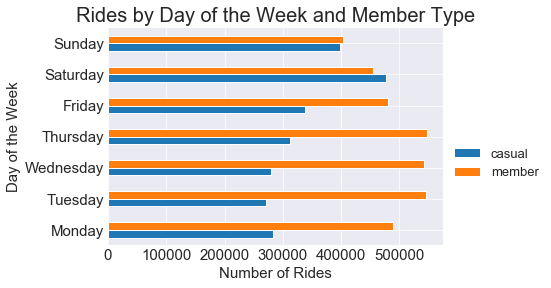

In [95]:
# Group data by day of week and member type, count number of rides, pivot table
rides_by_day = (
    df.groupby(["day_of_week", "member_casual"])
    .size()
    .reset_index(name="rides")
    .pivot(index="day_of_week", columns="member_casual", values="rides")
)

# Plot the pivoted table
rides_by_day.plot(kind="barh")

# Set plot title and axes labels
plt.title("Rides by Day of the Week and Member Type", fontsize=20)
plt.xlabel("Number of Rides", fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Day of the Week", fontsize=15)
plt.yticks(fontsize=15)
ax.grid(False)
ax.tick_params(bottom=False, left=True)
plt.legend(frameon=False, bbox_to_anchor=(1.0, 0.5), fontsize=13)
plt.style.use("seaborn-darkgrid")

# Show the plot
plt.show()

<strong>Observations: </strong>From the results we see that casual riders are more likely to take a ride on weekend while membership riders would use on weekday more often. The number of rides taken by members is generally higher than that of casual users on all days of the week except on Saturdays. On Saturdays, the number of rides taken by casual users is higher than that of members.
<br><br>
Let's overview the visuals of rides by type of rider on each month

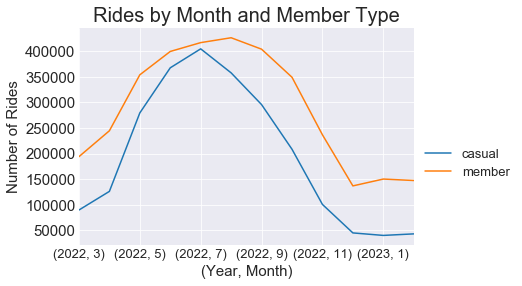

In [98]:
# Pivot the table
pivoted_table = (
    df.groupby(["member_casual", "year", "month"])
    .size()
    .reset_index(name="rides")
    .pivot_table(index=["year", "month"], columns="member_casual", values="rides")
)

# Create a line plot
pivoted_table.plot()

# Set plot title and axes labels
plt.style.use("seaborn-darkgrid")
plt.title("Rides by Month and Member Type", fontsize=20)
plt.xlabel("(Year, Month)", fontsize=15)
plt.xticks(fontsize=13)
plt.ylabel("Number of Rides", fontsize=15)
plt.yticks(fontsize=15)
ax.grid(False)
ax.tick_params(bottom=False, left=True)
plt.legend(frameon=False, bbox_to_anchor=(1.0, 0.5), fontsize=13)
plt.style.use("seaborn-darkgrid")

# Show the plot
plt.show()

<strong>Observations:</strong> The data shows that the demand for bike rides has increased from April 2022 to May 2022, reaching its peak in July 2022, with 404,915 casual rides and 417,088 member rides. From August 2022 to February 2023, the number of rides started to decrease.
<br>The number of rides for casual riders increased sharply on March 2022, indicating a possible surge in demand during that period.
<br><br>
Let's overview the visuals of rides by rideable type of rider

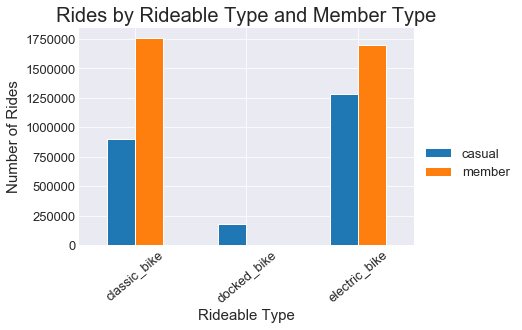

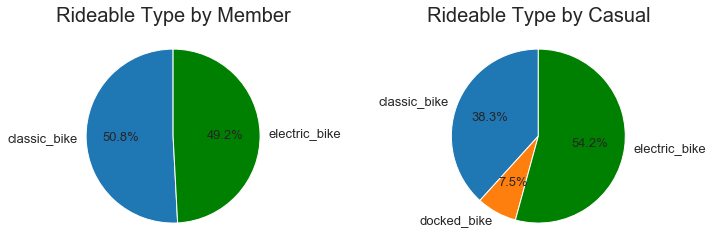

In [121]:
# Group data by day of week and member type, count number of rides, pivot table
rides_by_day = (
    df.groupby(["rideable_type", "member_casual"])
    .size()
    .reset_index(name="rides")
    .pivot(index="rideable_type", columns="member_casual", values="rides")
)

# Plot the pivoted table
rides_by_day.plot(kind="bar")

# Set plot title and axes labels
plt.style.use("seaborn-darkgrid")
plt.title("Rides by Rideable Type and Member Type", fontsize=20)
plt.xlabel("Rideable Type", fontsize=15)
plt.xticks(rotation=40, fontsize=13)
plt.ylabel("Number of Rides", fontsize=15)
plt.yticks(fontsize=13)
ax.grid(False)
ax.tick_params(bottom=False, left=True)
plt.legend(frameon=False, bbox_to_anchor=(1.0, 0.5), fontsize=13)

# Show the plot
plt.show()
print()

# Subset the data into two separate dataframes for member and casual
member_df = df.loc[df["member_casual"] == "member"]
casual_df = df.loc[df["member_casual"] == "casual"]

# Set the style to 'seaborn-darkgrid'
sns.set_style("darkgrid")

# Create the figure and two subplots for the two pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Define the colors for the pie charts
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red"]

# Plot the first pie chart for member
member_rides = member_df.groupby("rideable_type").size()
if "electric_bike" in member_rides.index:
    member_colors = [
        colors[i] if label != "electric_bike" else "green"
        for i, label in enumerate(member_rides.index)
    ]
else:
    member_colors = colors
member_rides.plot(
    kind="pie",
    ax=ax1,
    autopct="%1.1f%%",
    startangle=90,
    colors=member_colors,
    fontsize=13,
)
ax1.set_title("Rideable Type by Member", fontsize=20)
ax1.set_ylabel(None)


# Plot the second pie chart for casual
casual_rides = casual_df.groupby("rideable_type").size()
if "electric_bike" in casual_rides.index:
    casual_colors = [
        colors[i] if label != "electric_bike" else "green"
        for i, label in enumerate(casual_rides.index)
    ]
else:
    casual_colors = colors
casual_rides.plot(
    kind="pie",
    ax=ax2,
    autopct="%1.1f%%",
    startangle=90,
    colors=casual_colors,
    fontsize=13,
)
ax2.set_title("Rideable Type by Casual", fontsize=20)
ax2.set_ylabel(None)

# Show the plot
plt.show()

<strong>Observations:</strong> From this data, we can see that there are three different types of rideable bikes: classic_bike, docked_bike, and electric_bike. We can see that the docked_bike type only has data for the "casual" category and has no data for "member."<br>
Based on this information, electric_bike type has a higher number of rides for the casual category than for the member category, while the classic_bike type has a higher number of rides for the member category than for the casual category. 
<br><br>
Let's overview visual on the bike demand by hour and type of rider

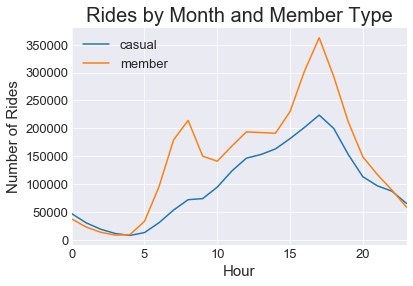

In [116]:
# Pivot the table
pivoted_table = (
    df.groupby(["member_casual", "hour"])
    .size()
    .reset_index(name="time")
    .pivot_table(index="hour", columns="member_casual", values="time")
)

# Create a line plot
pivoted_table.plot()

# Set plot title and axes labels
plt.style.use("seaborn-darkgrid")
plt.title("Rides by Month and Member Type", fontsize=20)
plt.xlabel("Hour", fontsize=15)
plt.xticks(fontsize=13)
plt.ylabel("Number of Rides", fontsize=15)
plt.yticks(fontsize=13)

ax.grid(False)
ax.tick_params(bottom=False, left=True)
plt.legend(fontsize=13)


# Show the plot
plt.show()

<strong>Observations:</strong> Both member and casual riders have different patterns of bike demand over 24 hours of a day:
<br>~ The demand for bikes from casual riders peaks in the late afternoon/early evening (around 17:00 - 18:00) and then gradually decreases;
<br>~ The demand for bikes from members is more spread out across the day, with the highest demand being in the morning (around 8:00 - 9:00) and late afternoon/early evening (around 16:00 - 18:00);
<br>~ The highest demand for bikes overall is around 17:00 - 18:00, with a total of 56,055 rides (37,168 casual and 18,887 members).


## 6. Act

### Final Conclusions
1. <div style="text-align: justify">Casual riders are more likely to ride longer and on weekends, while members ride short distance and more on weekdays. Members take more rides than casual riders on all days of the week except Saturdays, where casual riders take more rides;</div>
2. <div style="text-align: justify">There is a seasonal pattern to bike ride demand, with a peak in July 2022. There was a sudden increase in the number of casual rides in March 2022, indicating a possible surge in demand during that period;</div>
3. <div style="text-align: justify">The electric bike type has a higher number of rides for casual riders than for members, while the classic bike type has a higher number of rides for members than for casual riders. Electric bikes may be more appealing to casual riders who are less experienced with biking, while more experienced riders prefer both: the classic and the electric bike options;</div>
4. <div style="text-align: justify">The highest overall demand for bikes is around 17:00 - 18:00, with a total of 56,055 rides (37,168 casual and 18,887 members). Casual riders' demand peaks in the late afternoon/early evening, while members' demand is more spread out across the day, with the highest demand being in the morning and late afternoon/early evening; </div>
5. <div style="text-align: justify">Top 5 start stations for casual riders are all located near the Chicago lake shore and tourist attractions, indicating that the majority of the rides are likely taken by tourists. The most popular start and end stations are located in downtown Chicago, which suggests that the bike share program is most popular among urban commuters and tourists in the city center.</div>

### Recommendations
1. <div style="text-align: justify">Consider offering discounts for new membership deals during peak months of sudden increase, such as March 2022. This approach would attract more new members;</div>
2. <div style="text-align: justify">Consider adjusting the pricing of bikes during off-peak hours for casual riders. Providing discounts during less busy hours may incentivize riders to use the bike share program;</div>
3. <div style="text-align: justify">Continue to promote the bike share program to tourists, as the top 5 start stations for casual riders are located near the lake shore and tourist attractions. This could be done through partnerships with hotels and other tourist-focused businesses;</div>
4. <div style="text-align: justify">Consider to allocate bikes to the most popular start stations during peak hours of bike usage, which are mostly located in downtown Chicago;</div>
5. <div style="text-align: justify">Increase the availability of electric bikes, as casual riders are more likely would use it.</div>

### Additonal data that could expand scope of analysis
1. <div style="text-align: justify">Conduct marketing promotions and collect data on price and demand to determine the optimal price point;</div>
2. <div style="text-align: justify">Collect member addresses or neighborhood information to investigate if there are any location-specific factors that encourage membership;</div>
3. <div style="text-align: justify">Gather the age and gender profiles of clients, as this data could be used to identify the types of riders who could be targeted to attract new members.</div>